<a href="https://colab.research.google.com/github/domjablonski/neuralNetwork/blob/main/neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-fde9aa61304e>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


Epoch: 0 Loss: 1.0886152982711792
Epoch: 10 Loss: 0.9524869918823242
Epoch: 20 Loss: 0.7243440747261047
Epoch: 30 Loss: 0.5454151034355164
Epoch: 40 Loss: 0.46307218074798584
Epoch: 50 Loss: 0.3745568096637726
Epoch: 60 Loss: 0.27042338252067566
Epoch: 70 Loss: 0.18610163033008575
Epoch: 80 Loss: 0.13031607866287231
Epoch: 90 Loss: 0.0979464054107666
tensor(0.0685)
We got 29 correct out of 30


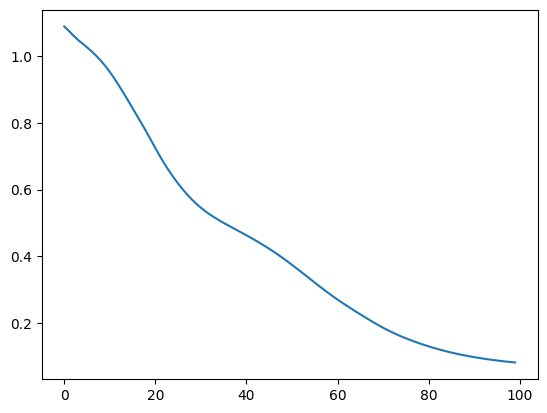

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

torch.manual_seed(130)
model = Model()




url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

x = my_df.drop('variety', axis = 1)
y = my_df['variety']
x = x.values
y = y.values
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=130)


x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(epochs), losses)




with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)

print(loss)

correct = 0
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_val = model.forward(data)
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got {correct} correct out of {len(x_test)}')


